In [8]:
import pandas as pd
import numpy as np
from scipy import signal
import math
import scipy.stats as stats

import matplotlib.pyplot as plt
import glob
import os

In [166]:
user='5NM4tiger'

data=pd.read_json("../../etc/no_header_pdr_raw_data/{}.json".format(user), orient='records', lines=True)
#data=pd.read_json('../../etc/step_num/5NM4tiger.csv', orient='records', lines=True)
labels=pd.read_csv('../../etc/label/{}.csv'.format(user), header=None)

acc_sencor=data[data['type']=='Accelerometer']

x, y, z=acc_sencor['x'], acc_sencor['y'], acc_sencor['z']

com_acc=[]
for value in zip(x, y, z):
    com_acc.append(math.sqrt(value[0]**2 + value[1]**2 + value[2]**2))
com_acc=com_acc[25*200:270*200]

In [167]:
unixTime=acc_sencor['unixTime']

a=[]
for t in unixTime:
    a.append(t//1000)

time_count=[]
for t in set(a):
    time_count.append(a.count(t))

In [168]:
N=len(com_acc)
dt=0.005
fc=3

t = np.arange(0, N*dt, dt)  # 時間軸
freq = np.linspace(0, 1.0/dt, N)  # 周波数軸

In [2]:
def getTimeLaps(labels):
    b=25
    timeLaps=[]
    old_time, old_label=labels.loc[0][0], labels.loc[0][1]
    for time, label in zip(labels.iloc[:, 0], labels.iloc[:, 1]):
        if old_label != label:
            timeLaps+=[[old_time-b, time-b]]
            old_time=time
            old_label=label
    timeLaps+=[[old_time-b, time-b]]
    return timeLaps

In [3]:
def getLabelLaps(labels):
    labelLaps=[]
    old_time, old_label=labels.loc[0][0], labels.loc[0][1]
    labelLaps+=[old_label]
    for time, label in zip(labels.iloc[:, 0], labels.iloc[:, 1]):
        if old_label != label:
            labelLaps+=[label]
            old_time=time
            old_label=label
    labelLaps+=[label]
    return labelLaps

In [9]:
def lowPass(wave, fc, dt):
    N=len(com_acc)

    t = np.arange(0, N*dt, dt)  # 時間軸
    freq = np.linspace(0, 1.0/dt, N)  # 周波数軸
    
    F = np.fft.fft(wave)
    # 正規化 + 交流成分2倍
    F = F/(N/2)
    F[0] = F[0]/2
    
    # 配列Fをコピー
    F2 = F.copy()
    # ローパスフィル処理（カットオフ周波数を超える帯域の周波数信号を0にする）
    F2[(freq > fc)] = 0
    # 高速逆フーリエ変換（時間信号に戻す）
    f2 = np.fft.ifft(F2)
    # 振幅を元のスケールに戻す
    f2 = np.real(f2*N)
    
    return f2

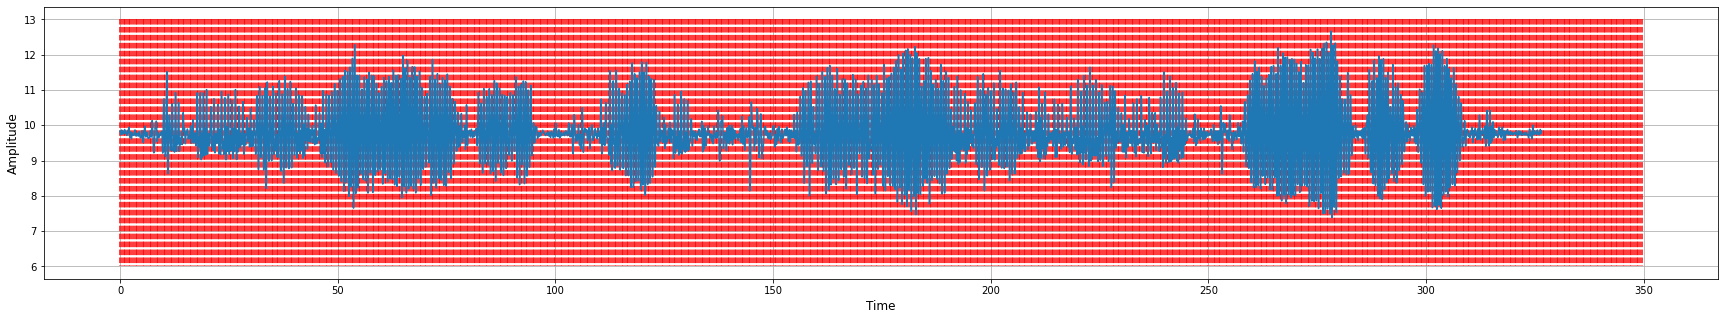

In [8]:
color_list={'m':'b', 's':'g', 'o':'r', 'no':'w'}
N=len(com_acc)
t = np.arange(0, N*dt, dt)  # 時間軸

fig, ax = plt.subplots(figsize=(30, 5))
acc=lowPass(fc=3, dt=0.005, wave=com_acc)
plt.plot(t, acc)

timeLaps=getTimeLaps(labels)
labelLaps=getLabelLaps(labels)

#for time, label in zip(timeLaps, labelLaps):
#    ax.axvspan(time[0], time[1], color=color_list[label], alpha=0.3)
    
plt.vlines(np.arange(0.0, 350, 0.4), 13, 6, "red", linestyles='dashed')
#M=np.array([[8080, 10.530845608590932], [8240, 10.339119634153759], [8400, 6.9436008792975], [8560, 11.172175800566894], [8720, 8.746550199907157], [8880, 7.175553158080462], [9040, 12.07858113546295], [9200, 7.643329806990813], [9360, 8.519904736995674], [9520, 11.757034959562807], [9680, 8.373889349879533], [9840, 8.3525223034606]])
#plt.scatter((M[:, 0]-8000)/200, M[:, 1])

plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid()
plt.show()

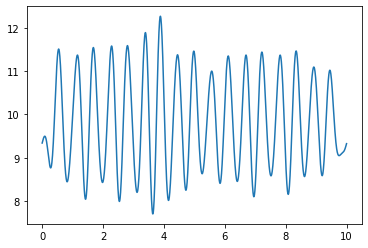

In [14]:
#fig, ax = plt.subplots(figsize=(20, 5))
acc=lowPass(fc=3, dt=0.005, wave=com_acc)
plt.plot(t, acc)

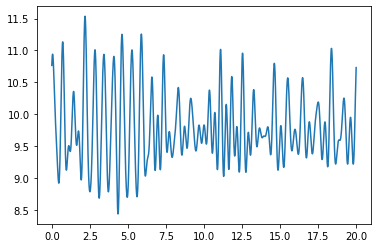

In [30]:
#fig, ax = plt.subplots(figsize=(20, 5))
acc=lowPass(fc=3, dt=0.005, wave=com_acc)
plt.plot(t, acc)

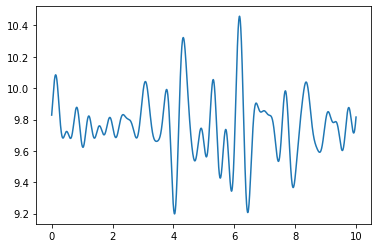

In [22]:
#fig, ax = plt.subplots(figsize=(20, 5))
acc=lowPass(fc=3, dt=0.005, wave=com_acc)
plt.plot(t, acc)

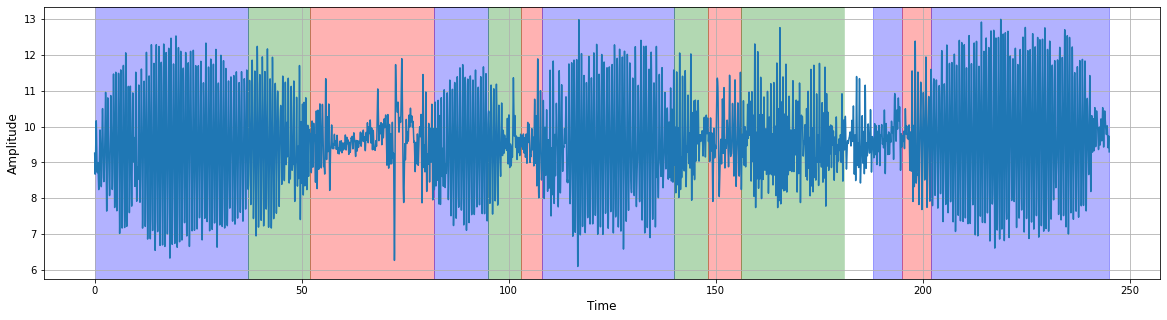

In [171]:
color_list={'m':'b', 's':'g', 'o':'r', 'no':'w', 'f':'w'}

fig, ax = plt.subplots(figsize=(20, 5))
acc=lowPass(fc=3, dt=0.005, wave=com_acc)
plt.plot(t, acc)

timeLaps=getTimeLaps(labels)
labelLaps=getLabelLaps(labels)

for time, label in zip(timeLaps, labelLaps):
    ax.axvspan(time[0], time[1], color=color_list[label], alpha=0.3)

plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid()
plt.show()

In [4]:
user='6NM5tamuchin'
a=pd.read_csv('../../etc/test/{}.csv'.format(user))
labels=pd.read_csv('../../etc/label/{}.csv'.format(user), header=None)
g=pd.read_csv('../../etc/gradient/{}.csv'.format(user))

a=a[a['user']=='5NM4tiger']
a=a['SC']

In [124]:
from scipy.stats import gaussian_kde

res=[]
for i in range(0, len(a.values)):
    res+=[i]*int(a.values[i])
    
kde=gaussian_kde(res, bw_method=0.1)
estimates=np.exp(kde(np.linspace(0, len(a), num=len(a)+2)))

NameError: name 'mm_acc' is not defined

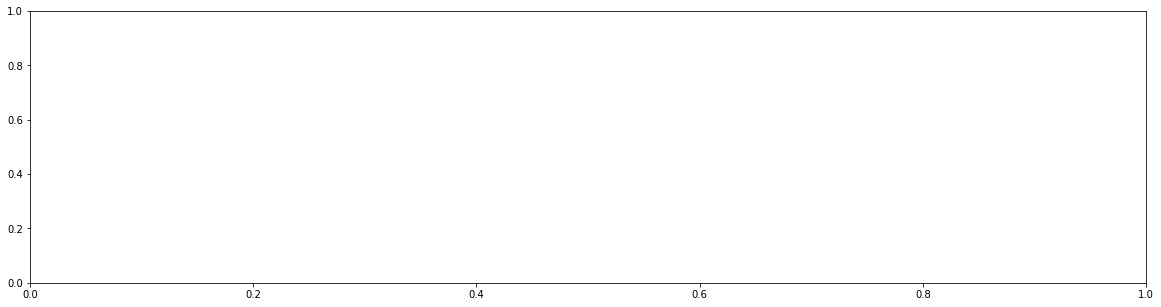

In [76]:
color_list={'m':'b', 's':'g', 'o':'r', 'no':'w', 'f':"w"}

fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(range(0, len(estimates)), mm_acc)
plt.plot(range(0, len(a)), a)

timeLaps=getTimeLaps(labels)
labelLaps=getLabelLaps(labels)

for time, label in zip(timeLaps, labelLaps):
    ax.axvspan(time[0], time[1], color=color_list[label], alpha=0.3)

plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid()
plt.show()

In [11]:
def diff(f, x):
    h=10e-10
    return (f(x+h)-f(x))/h

def func(x):
    return np.exp(kde([x]))

def make_line(x, a):
    d=diff(func, a)
    return d*(x-a)+func(a)
    
#x1=np.arange(0, 100, 0.1)
#f1=func(x1)
#print(diff(func, 40))

#line=make_line(x1, a=30)

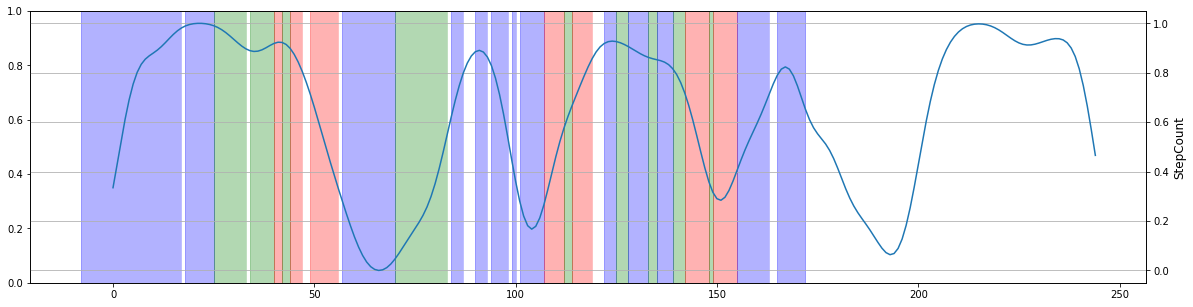

In [6]:
color_list={'m':'b', 's':'g', 'o':'r', 'no':'w', 'f':'w'}

fig, ax = plt.subplots(figsize=(20, 5))
#ax.plot(range(0, len(estimates)), estimates, 'red')

ax2=ax.twinx()
ax2.plot(range(0, len(a)), a)

timeLaps=getTimeLaps(labels)
labelLaps=getLabelLaps(labels)

for time, label in zip(timeLaps, labelLaps):
    ax.axvspan(time[0], time[1], color=color_list[label], alpha=0.3)

plt.xlabel("Time", fontsize=12)
plt.ylabel("StepCount", fontsize=12)
plt.grid()
plt.show()

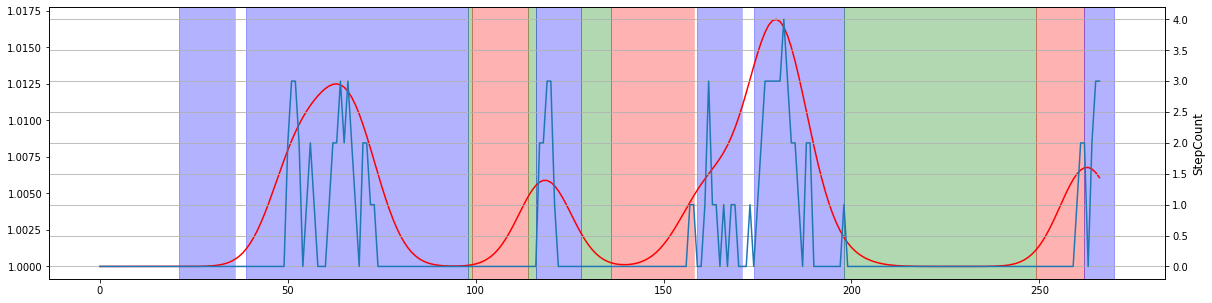

In [90]:
color_list={'m':'b', 's':'g', 'o':'r', 'no':'w', 'f':'w'}

fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(range(0, len(estimates)), estimates, 'red')

ax2=ax.twinx()
ax2.plot(range(0, len(a)), a)

timeLaps=getTimeLaps(labels)
labelLaps=getLabelLaps(labels)

for time, label in zip(timeLaps, labelLaps):
    ax.axvspan(time[0], time[1], color=color_list[label], alpha=0.3)

plt.xlabel("Time", fontsize=12)
plt.ylabel("StepCount", fontsize=12)
plt.grid()
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler, minmax_scale

minmax = MinMaxScaler(feature_range=(-1, 1))
mm_acc=minmax_scale(estimates)

NameError: name 'estimates' is not defined

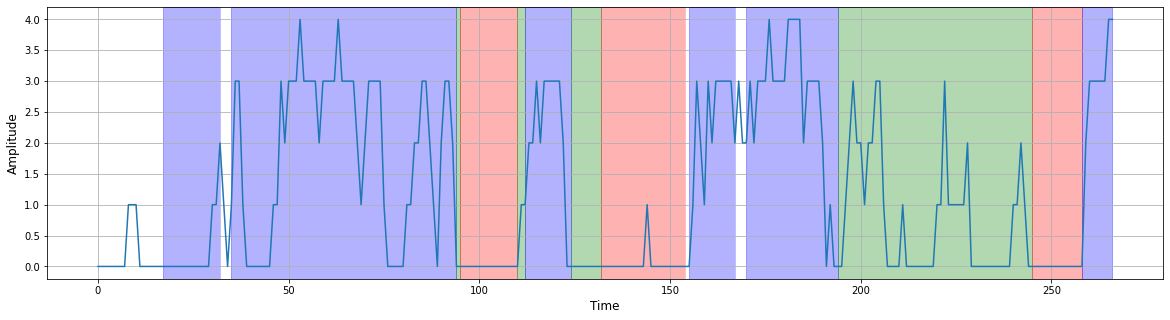

In [86]:
color_list={'m':'b', 's':'g', 'o':'r', 'no':'w', 'f':'w'}

fig, ax = plt.subplots(figsize=(20, 5))
#plt.plot(range(0, len(estimates)), estimates)
plt.plot(range(0, len(a)), a)

timeLaps=getTimeLaps(labels)
labelLaps=getLabelLaps(labels)

for time, label in zip(timeLaps, labelLaps):
    ax.axvspan(time[0], time[1], color=color_list[label], alpha=0.3)

plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid()
plt.show()

In [192]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

kde=gaussian_kde(res, bw_method=0.05)
estimates=kde(np.linspace(0, len(a), num=len(a)))

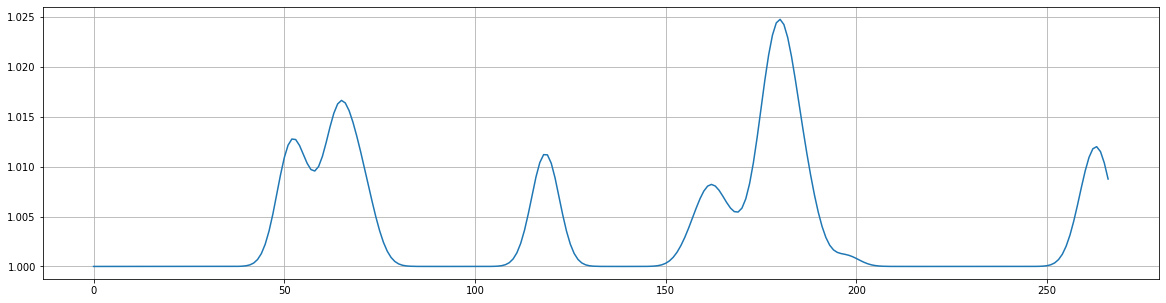

In [212]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(a)

timeLaps=getTimeLaps(labels)
labelLaps=getLabelLaps(labels)

#for time, label in zip(timeLaps, labelLaps):
#    ax.axvspan(time[0], time[1], color=color_list[label], alpha=0.3)

plt.grid()
plt.show()

In [46]:
F = np.fft.fft(com_acc)
# 正規化 + 交流成分2倍
F = F/(N/2)
F[0] = F[0]/2

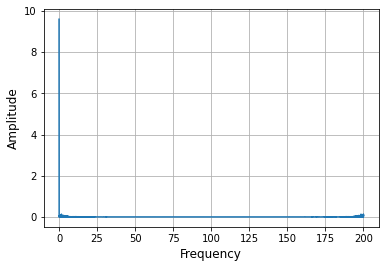

In [47]:
plt.plot(freq, np.abs(F), label='|F(k)|')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.grid()

In [55]:
fc=1
# 配列Fをコピー
F2 = F.copy()
# ローパスフィル処理（カットオフ周波数を超える帯域の周波数信号を0にする）
F2[(freq > fc)] = 0
# 高速逆フーリエ変換（時間信号に戻す）
f2 = np.fft.ifft(F2)

In [57]:
# 高速逆フーリエ変換（時間信号に戻す）
f2 = np.fft.ifft(F2)

# 振幅を元のスケールに戻す
f2 = np.real(f2*N)

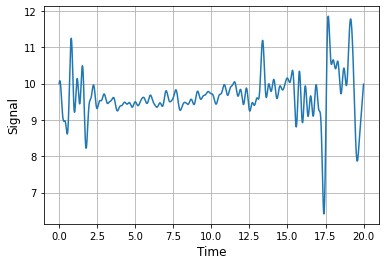

In [54]:
plt.plot(t, f2, label='f2(n)')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Signal", fontsize=12)
plt.grid()
plt.show()

In [107]:
len([v for v in f2 if v>14])

571

# SUB

In [244]:
data=pd.read_json("../../etc/no_header_pdr_raw_data/{}.json".format('5NM4tiger'), orient='records', lines=True)

In [176]:
unixTime=acc_sencor['unixTime']

a=[]
for t in unixTime:
    a.append(t//1000)

time_count=[]
for t in set(a):
    time_count.append(a.count(t))

# 合成加速度

In [292]:
data=pd.read_json("../../etc/no_header_pdr_raw_data/{}.json".format('5NM4tiger'), orient='records', lines=True)

acc_sencor=data[data['type']=='Accelerometer']

x, y, z=acc_sencor['x'], acc_sencor['y'], acc_sencor['z']

com_acc=[]
for value in zip(x, y, z):
    com_acc.append(math.sqrt(value[0]**2 + value[1]**2 + value[2]**2))

In [12]:
def getTimeCount(unixTime):
    a=[]
    for t in unixTime:
        a.append(t//1000)
        
    time_count=[]
    for t in set(a):
        time_count.append(a.count(t))
    return time_count

In [60]:
c=pd.read_json("../../etc/no_header_pdr_raw_data/{}.json".format('6NM9tsubouchi'), orient='records', lines=True)

# Main

In [34]:
def getPeak(values, Uthreshold, Othreshold):
    flag=False
    peakCount=0
    
    for value in values:
        if value > Uthreshold and value < Othreshold and flag==False:
            flag=True
            peakCount+=1
        if value < Uthreshold and flag==True:
            flag=False
    return peakCount

def getOPeak(values, Uthreshold):
    peakCount=0
    
    for index in range(1, len(values)-1):
        if values[index] > Uthreshold:
            if values[index] > values[index-1] and values[index+1] > values[index]:
                peakCount+=1
    return peakCount

def getUPeak(values, Othreshold):
    peakCount=0
    
    for index in range(1, len(values)-1):
        if values[index] < Othreshold:
            if values[index] > values[index-1] and values[index+1] > values[index]:
                peakCount+=1
    return peakCount

"""
def getPeak(values, Uthreshold, Othreshold):
    peakCount=0
    for index in range(1, len(values)-1, 1):
        if values[index] > Uthreshold and Othreshold > values[index]:
            if values[index] > values[index-1] and values[index+1] > values[index]:
                peakCount+=1
    return peakCount
"""

'\ndef getPeak(values, Uthreshold, Othreshold):\n    peakCount=0\n    for index in range(1, len(values)-1, 1):\n        if values[index] > Uthreshold and Othreshold > values[index]:\n            if values[index] > values[index-1] and values[index+1] > values[index]:\n                peakCount+=1\n    return peakCount\n'

In [13]:
def findMinPeak(deltaList):
    return (deltaList[0] >=0 and deltaList[1] <=0)

def findMaxPeak(deltaList):
    return (deltaList[0] <=0 and deltaList[1] >=0)

def step_count(values, times, DIFF_THRESH):
    #RATE_THRESH=80
    RATE_THRESH=400
    
    delta=0
    lastDelta=0
    lastValue=0
    startTime=0
    diff=0
    isPeak=True
    deltaList=[]
    counter=0
    k=0
    #deltaList=[変位, 前変位, 合成加速度, 時間]
    M=[]
    for value, time in zip(values, times):
        if(delta!=0 and lastDelta!=0):
            deltaList+=[[delta, lastDelta, value, time]]
        if startTime==0:
            startTime=time
            
        if (time-startTime)>=RATE_THRESH:
            if (isPeak):
                newHead=0
                for i in range(len(deltaList)):
                    if findMinPeak(deltaList[i]):
                        if (diff < np.abs(deltaList[i][2] - deltaList[0][2])):
                            diff = np.abs(deltaList[i][2] - deltaList[0][2])
                            newHead=i
                if newHead<len(deltaList):
                    startTime=deltaList[newHead][3]
                    deltaList=deltaList[newHead:]
                    if diff > DIFF_THRESH:
                        counter+=1
                    diff=0
                    isPeak=False
                else:
                    startTime=0
            else:
                newHead=0
                for i in range(len(deltaList)):
                    if findMaxPeak(deltaList[i]):
                        if (diff < np.abs(deltaList[i][2] - deltaList[0][2])):
                            diff = np.abs(deltaList[i][2] - deltaList[0][2])
                            newHead=i
                if newHead<len(deltaList):
                    startTime=deltaList[newHead][3]
                    deltaList=deltaList[newHead:]
                    diff=0
                    isPeak=True
                else:
                    startTime=0
        lastDelta=delta
        delta=value-lastValue
        lastValue=value
    return counter

In [166]:
SENSOR="Accelerometer"
w=2
file_name='5NM4tiger'
count=0

new_df=pd.DataFrame()
df=pd.read_json("../../etc/no_header_pdr_raw_data/{}.json".format(file_name), orient='records', lines=True)
label=pd.read_csv("../../etc/label/{}.csv".format(file_name), header=None)    

acc_sencor=df[df['type']==SENSOR]
times=acc_sencor['unixTime']
START_TIME=label[0][0]
END_TIME=label[0][len(label)-1]

x, y, z=acc_sencor['x'], acc_sencor['y'], acc_sencor['z']
com_acc=[]
for value in zip(x, y, z):
    com_acc.append(math.sqrt(value[0]**2 + value[1]**2 + value[2]**2))
time_count=getTimeCount(times)
    
f2=lowPass(wave=com_acc, fc=3, dt=0.005)

for ti in range(START_TIME, END_TIME+1, 1):
    S=sum(time_count[:ti])
    f=f2[S-(200*w):S]
    time=times[S-(200*w):S]
    SC=step_count(f, time, 1)
    new_df=new_df.append({"user":file_name, "label":label[1][count], "SC":SC}, ignore_index=True)
    count+=1
new_df.to_csv("../../etc/step_num/{}.csv".format(file_name), index=False)

In [82]:
ROUND=1000
dt=0.005
#fc1=20
fc2=3
w=2
SENSOR="Accelerometer"

for file in glob.glob("../../etc/label/*.csv")[38:39]:
    file_name=os.path.basename(file).split(".csv")[0]
    print(file_name)
    new_df=pd.DataFrame()
    label=pd.read_csv("../../etc/label/{}.csv".format(file_name), header=None)    
    df=pd.read_json("../../etc/no_header_pdr_raw_data/{}.json".format(file_name), orient='records', lines=True)
    
    START_TIME=label[0][0]
    END_TIME=label[0][len(label)-1]
    count=0
    
    acc_sencor=df[df['type']==SENSOR]
    unixTime=acc_sencor['unixTime']
    x, y, z=acc_sencor['x'], acc_sencor['y'], acc_sencor['z']
    com_acc=[]
    for value in zip(x, y, z):
        com_acc.append(math.sqrt(value[0]**2 + value[1]**2 + value[2]**2))
    time_count=getTimeCount(unixTime)

    f2=lowPass(wave=com_acc, fc=3, dt=0.005)
    print(f2)
    #fig, ax = plt.subplots(figsize=(20, 5))
    #plt.plot(t, acc)
    #t = np.arange(0, N*dt, dt)  # 時間軸
    
    for ti in range(START_TIME, END_TIME+1, 1):
        S=sum(time_count[:ti])
        f=f2[S-(200*w):S]
        #f=f[S-(200*w):S]
        #count_1=len([v for v in f if 0<=v and v<1])
        #count_2=len([v for v in f if 1<=v and v<2])
        #count_3=len([v for v in f if 2<=v and v<3])
        #count_4=len([v for v in f if 3<=v and v<4])
        #count_5=len([v for v in f if 4<=v and v<5])
        #count_6=len([v for v in f if 5<=v and v<6])
        #count_7=len([v for v in f if 6<=v and v<7])
        #count_05=getPeak(f, 0.5)
        #count_06=getPeak(f, 0.6)
        #count_07=getPeak(f, 0.7)
        #count_08=getPeak(f, 0.8)
        #count_09=getPeak(f, 0.9)
        count_O=getPeak(f, 9, 10)
        count_S=getPeak(f, 10, 11)
        count_M=getPeak(f, 11, 12)
        #count_13=getPeak(f, 13)
        #count_14=getPeak(f, 14)
        new_df=new_df.append({"user":file_name, "label":label[1][count], 
                              "count_S":count_S, "count_M":count_M, 'count_O':count_O}, 
                             ignore_index=True)
        count+=1
        
    #new_df.to_csv("../../etc/step_num/{}.csv".format(file_name), index=False)

5NM4tiger
[8.7078028  8.70694543 8.70620443 ... 8.71107069 8.7098666  8.70877676]
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
40

In [19]:
ROUND=1000
dt=0.005
#fc1=20
fc2=3
w=2
SENSOR="Accelerometer"

for file in glob.glob("../../etc/label/*.csv"):
    file_name=os.path.basename(file).split(".csv")[0]
    print(file_name)
    new_df=pd.DataFrame()
    label=pd.read_csv("../../etc/label/{}.csv".format(file_name), header=None)    
    df=pd.read_json("../../etc/no_header_pdr_raw_data/{}.json".format(file_name), orient='records', lines=True)
    acc_sencor=df[df['type']==SENSOR]
    count=0
    
    times=acc_sencor['unixTime']
    START_TIME=label[0][0]
    END_TIME=label[0][len(label)-1]

    x, y, z=acc_sencor['x'], acc_sencor['y'], acc_sencor['z']
    com_acc=[]
    for value in zip(x, y, z):
        com_acc.append(math.sqrt(value[0]**2 + value[1]**2 + value[2]**2))
    time_count=getTimeCount(times)

    f2=lowPass(wave=com_acc, fc=3, dt=0.005)

    for ti in range(START_TIME, END_TIME+1, 1):
        S=sum(time_count[:ti])
        f=f2[S-(200*w):S]
        time=times[S-(200*w):S]
        SC=step_count(f, time, 3.0)
        new_df=new_df.append({"user":file_name, "label":label[1][count], "SC":SC}, ignore_index=True)
        count+=1
    new_df.to_csv("../../etc/velocity_threshold/30/{}.csv".format(file_name), index=False)

6NM9tsubouchi
6NM6yahoo
7NM3miyazaki
5NM4tsukky
6NM7kobeG
6NM1yossi
7NM5yakkun
5NM8shishamo
7NM2toshiki
5NM8kan
6NM6kobeH
6NM6nishio
7NM3zimotoE
6NM7tamuchin
6NM3kobeC
6NM4kobeI
6NM5kobeD
7NM4zimotoD
6NM5kobeF
7NM7yakkun
7NM9zimotoB
6NM5yahoo
6NM2kobeB
7NM5zimotoA
6NM6tamuchin
7NM8zimotoC
5NMEXTRAharasho
6NM6kobeA
7NM7zimotoD
7NM6koho
7NM1koho
7NM6zimotoE
6NM9nishio
5NM1shibataku
7NM1miyazaki
6NM9senkita
7NM5zimotoC
6NM2tamuchin
5NM4tiger
6NM5tamuchin
7NM2zimotoD
7NM2miyazaki
6NM4kobeD
5NM4yahoo
7NM7zimotoE
6NM8kobeI
7NM9yakkun
7NM9miyazaki
6NM2kobeG
5NM2tiger
5NM9yahoo
6NM3tamuchin
6NM9tamuchin
6NM3kobeH
6NM8tsubouchi
7NM1zimotoA
6NM4tsubouchi
7NM6zimotoB
7NM4zimotoE
7NM3zimotoA
6NM8yahoo
6NM1kobeA
5NM4arthur
7NM8zimotoB
7NM5miyazaki
6NM8kobeC
5NM7shibataku
7NM2zimotoC
7NM2zimotoB
7NM5toshiki
7NM4miyazaki
7NM7miyazaki
6NM7kobeB
7NM9zimotoA
6NM1senkita
6NM8tamuchin
7NM4zimotoB
6NM5kobeE
6NM9ganpon
7NM8miyazaki
6NM1kobeE


In [25]:
from scipy.stats import gaussian_kde
from sklearn.preprocessing import MinMaxScaler, minmax_scale

for file in glob.glob("../../etc/label/*.csv"):
    file_name=os.path.basename(file).split(".csv")[0]
    print(file_name)
    new_df=pd.DataFrame()
    label=pd.read_csv("../../etc/label/{}.csv".format(file_name), header=None)    
    df=pd.read_csv("../../etc/velocity_threshold/30/{}.csv".format(file_name))
    count=0

    res=[]
    for i in range(0, len(df["SC"].values)):
        res+=[i]*int(df["SC"].values[i])
    
    kde=gaussian_kde(res, bw_method=0.05)
    estimates=np.exp(kde(np.linspace(0, len(df["SC"]), num=len(df["SC"])+2)))
    estimates=minmax_scale(estimates)
    
    for i in range(1, len(estimates)-1):
        new_df=new_df.append({"user":file_name, "label":label[1][count], "SC":estimates[i], "SCP":estimates[i-1], "SCF":estimates[i+1]}, ignore_index=True)
        count+=1
    new_df.to_csv("../../etc/velocity_threshold/30c/{}.csv".format(file_name), index=False)

6NM9tsubouchi
6NM6yahoo
7NM3miyazaki
5NM4tsukky
6NM7kobeG
6NM1yossi
7NM5yakkun
5NM8shishamo
7NM2toshiki
5NM8kan
6NM6kobeH
6NM6nishio
7NM3zimotoE
6NM7tamuchin
6NM3kobeC
6NM4kobeI
6NM5kobeD
7NM4zimotoD
6NM5kobeF
7NM7yakkun
7NM9zimotoB
6NM5yahoo
6NM2kobeB
7NM5zimotoA
6NM6tamuchin
7NM8zimotoC
5NMEXTRAharasho
6NM6kobeA
7NM7zimotoD
7NM6koho
7NM1koho
7NM6zimotoE
6NM9nishio
5NM1shibataku
7NM1miyazaki
6NM9senkita
7NM5zimotoC
6NM2tamuchin
5NM4tiger
6NM5tamuchin
7NM2zimotoD
7NM2miyazaki
6NM4kobeD
5NM4yahoo
7NM7zimotoE
6NM8kobeI
7NM9yakkun
7NM9miyazaki
6NM2kobeG
5NM2tiger
5NM9yahoo
6NM3tamuchin
6NM9tamuchin
6NM3kobeH
6NM8tsubouchi
7NM1zimotoA
6NM4tsubouchi
7NM6zimotoB
7NM4zimotoE
7NM3zimotoA
6NM8yahoo
6NM1kobeA
5NM4arthur
7NM8zimotoB
7NM5miyazaki
6NM8kobeC
5NM7shibataku
7NM2zimotoC
7NM2zimotoB
7NM5toshiki
7NM4miyazaki
7NM7miyazaki
6NM7kobeB
7NM9zimotoA
6NM1senkita
6NM8tamuchin
7NM4zimotoB
6NM5kobeE
6NM9ganpon
7NM8miyazaki
6NM1kobeE


In [122]:
pd.read_csv('../../etc/step_num_contSF/5NM4arthur.csv')["SC"][:30]

0     0.000000e+00
1     0.000000e+00
2     0.000000e+00
3     0.000000e+00
4     0.000000e+00
5     0.000000e+00
6     0.000000e+00
7     0.000000e+00
8     0.000000e+00
9     0.000000e+00
10    0.000000e+00
11    0.000000e+00
12    0.000000e+00
13    0.000000e+00
14    0.000000e+00
15    0.000000e+00
16    0.000000e+00
17    0.000000e+00
18    0.000000e+00
19    0.000000e+00
20    0.000000e+00
21    0.000000e+00
22    0.000000e+00
23    2.842171e-14
24    2.415845e-13
25    1.961098e-12
26    1.473666e-11
27    1.021121e-10
28    6.511698e-10
29    3.823210e-09
Name: SC, dtype: float64

In [31]:
from scipy.stats import gaussian_kde
from sklearn.preprocessing import MinMaxScaler, minmax_scale

for file in glob.glob("../../etc/label/*.csv"):
    file_name=os.path.basename(file).split(".csv")[0]
    print(file_name)
    new_df=pd.DataFrame()
    label=pd.read_csv("../../etc/label/{}.csv".format(file_name), header=None)    
    step_num=pd.read_csv("../../etc/velocity_threshold/30/{}.csv".format(file_name))["SC"]
    count=0
    
    res=[]
    for i in range(0, len(step_num.values)):
        res+=[i]*int(step_num.values[i])
    
    kde=gaussian_kde(res, bw_method=0.1)
    
    gradient=minmax_scale([diff(func, i)[0] for i in range(len(step_num))])
    for i in range(len(step_num)):
        new_df=new_df.append({"user":file_name, "label":label[1][count], "gradient":gradient[i]}, ignore_index=True)
        count+=1
    new_df.to_csv("../../etc/velocity_threshold/30g/{}.csv".format(file_name), index=False)

6NM9tsubouchi
6NM6yahoo
7NM3miyazaki
5NM4tsukky
6NM7kobeG
6NM1yossi
7NM5yakkun
5NM8shishamo
7NM2toshiki
5NM8kan
6NM6kobeH
6NM6nishio
7NM3zimotoE
6NM7tamuchin
6NM3kobeC
6NM4kobeI
6NM5kobeD
7NM4zimotoD
6NM5kobeF
7NM7yakkun
7NM9zimotoB
6NM5yahoo
6NM2kobeB
7NM5zimotoA
6NM6tamuchin
7NM8zimotoC
5NMEXTRAharasho
6NM6kobeA
7NM7zimotoD
7NM6koho
7NM1koho
7NM6zimotoE
6NM9nishio
5NM1shibataku
7NM1miyazaki
6NM9senkita
7NM5zimotoC
6NM2tamuchin
5NM4tiger
6NM5tamuchin
7NM2zimotoD
7NM2miyazaki
6NM4kobeD
5NM4yahoo
7NM7zimotoE
6NM8kobeI
7NM9yakkun
7NM9miyazaki
6NM2kobeG
5NM2tiger
5NM9yahoo
6NM3tamuchin
6NM9tamuchin
6NM3kobeH
6NM8tsubouchi
7NM1zimotoA
6NM4tsubouchi
7NM6zimotoB
7NM4zimotoE
7NM3zimotoA
6NM8yahoo
6NM1kobeA
5NM4arthur
7NM8zimotoB
7NM5miyazaki
6NM8kobeC
5NM7shibataku
7NM2zimotoC
7NM2zimotoB
7NM5toshiki
7NM4miyazaki
7NM7miyazaki
6NM7kobeB
7NM9zimotoA
6NM1senkita
6NM8tamuchin
7NM4zimotoB
6NM5kobeE
6NM9ganpon
7NM8miyazaki
6NM1kobeE


In [179]:
df=pd.read_csv("../../etc/step_num/5NM4tiger.csv")

# Label比べ

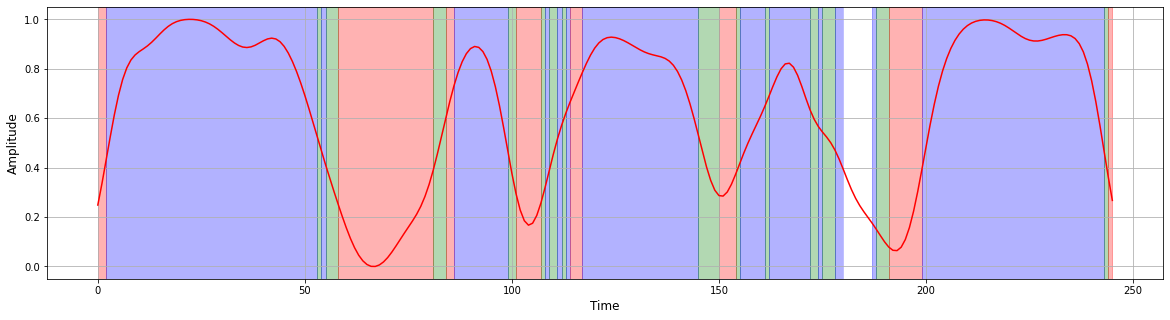

In [165]:
color_list={'m':'b', 's':'g', 'o':'r', 'no':'w', 'f':"w", 1:'b', 2:'g', 3:'r', 0:'w'}

fig, ax = plt.subplots(figsize=(20, 5))
estimates=pd.read_csv('../../etc/step_num_cont/5NM4tiger.csv')["SC"]
label=pd.read_csv('../../etc/pred_label_20201111/5NM4tigerg.csv')
labels=pd.DataFrame()
labels['time']=range(len(label['label']))
labels['label']=label['label']

timeLaps=getTimeLaps(labels)
labelLaps=getLabelLaps(labels)

#acc=lowPass(fc=3, dt=0.005, wave=com_acc)
#ax2=ax.twinx()
#ax2.plot(t,acc)
ax.plot(range(0, len(estimates)), estimates, 'red')

for time, label in zip(timeLaps, labelLaps):
    ax.axvspan(time[0], time[1], color=color_list[label], alpha=0.3)

plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid()
plt.show()

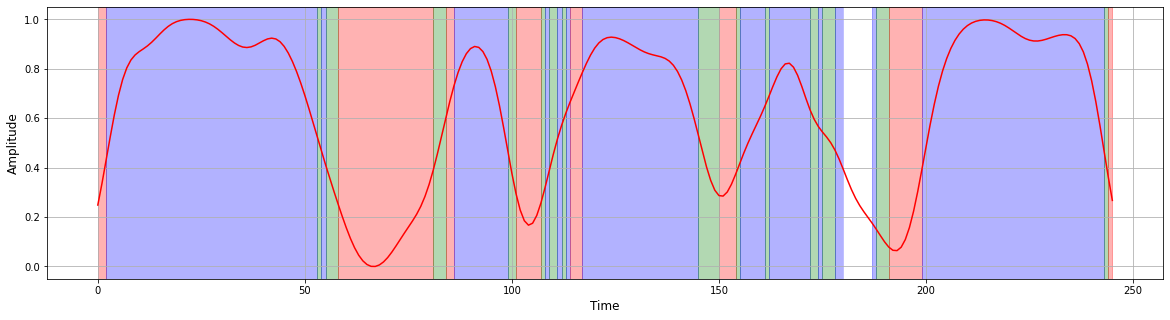

In [163]:
color_list={'m':'b', 's':'g', 'o':'r', 'no':'w', 'f':"w", 1:'b', 2:'g', 3:'r', 0:'w'}

fig, ax = plt.subplots(figsize=(20, 5))
estimates=pd.read_csv('../../etc/step_num_cont/5NM4tiger.csv')["SC"]
label=pd.read_csv('../../etc/pred_label_20201111/5NM4tigerg.csv')
labels=pd.DataFrame()
labels['time']=range(len(label['label']))
labels['label']=label['label']

timeLaps=getTimeLaps(labels)
labelLaps=getLabelLaps(labels)

#acc=lowPass(fc=3, dt=0.005, wave=com_acc)
#ax2=ax.twinx()
#ax2.plot(t,acc)
ax.plot(range(0, len(estimates)), estimates, 'red')

for time, label in zip(timeLaps, labelLaps):
    ax.axvspan(time[0], time[1], color=color_list[label], alpha=0.3)

plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid()
plt.show()

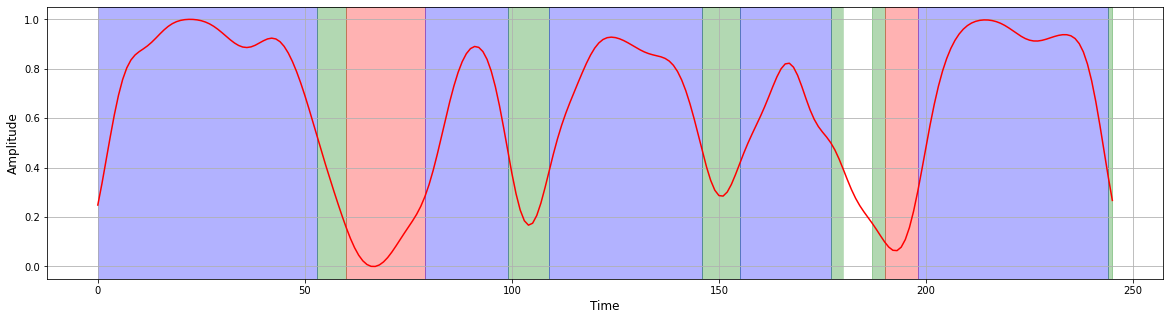

In [164]:
color_list={'m':'b', 's':'g', 'o':'r', 'no':'w', 'f':"w", 1:'b', 2:'g', 3:'r', 0:'w'}

fig, ax = plt.subplots(figsize=(20, 5))
estimates=pd.read_csv('../../etc/step_num_cont/5NM4tiger.csv')["SC"]
label=pd.read_csv('../../etc/pred_label_20201111/5NM4tigerpfg.csv')
labels=pd.DataFrame()
labels['time']=range(len(label['label']))
labels['label']=label['label']

timeLaps=getTimeLaps(labels)
labelLaps=getLabelLaps(labels)

#acc=lowPass(fc=3, dt=0.005, wave=com_acc)
#ax2=ax.twinx()
#ax2.plot(t,acc)
ax.plot(range(0, len(estimates)), estimates, 'red')

for time, label in zip(timeLaps, labelLaps):
    ax.axvspan(time[0], time[1], color=color_list[label], alpha=0.3)

plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid()
plt.show()

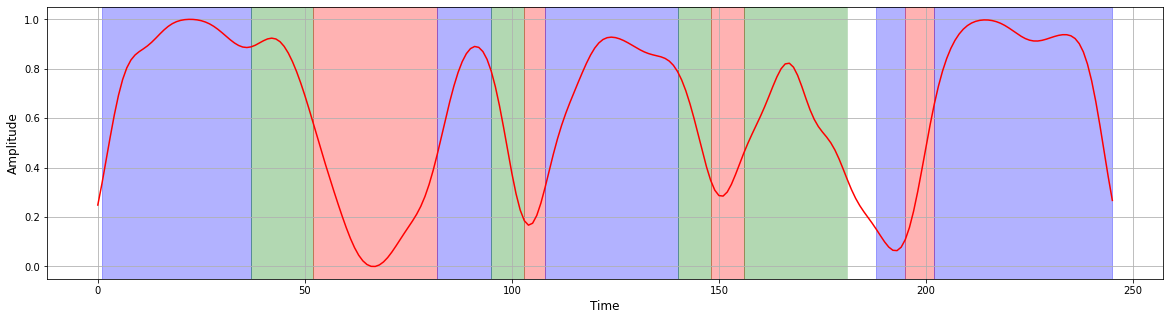

In [26]:
color_list={'m':'b', 's':'g', 'o':'r', 'no':'w', 'f':"w", 1:'b', 2:'g', 3:'r'}

fig, ax = plt.subplots(figsize=(20, 5))
labels=pd.read_csv('../../etc/label/5NM4tiger.csv')
estimates=pd.read_csv('../../etc/step_num_cont/5NM4tiger.csv')["SC"]

timeLaps=getTimeLaps(labels)
labelLaps=getLabelLaps(labels)

ax.plot(range(0, len(estimates)), estimates, 'red')

#ax2=ax.twinx()
#ax2.plot(range(0, len(a)), a)

for time, label in zip(timeLaps, labelLaps):
    ax.axvspan(time[0], time[1], color=color_list[label], alpha=0.3)

plt.xlabel("Time", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
plt.grid()
plt.show()